# Evaluating the model/algorithm to be used for predictions


### Ways to evaluate Scikit-Learn models/estimators:
 1. Estimator's built-in 'score()' method
 2. Cross Validation score
 3. Problem-specific metric functions (depending on the model/type of problem)
 4. Scoring Parameter
 5. Scikit Learn Functions
 Refer to this guide: https://scikit-learn.org/stable/modules/model_evaluation.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'B:\jupyter\Projects\Cheat Sheets\Sci Kit Learn Data\heart-disease.csv'
heart_disease = pd.read_csv(file_path)
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 1. Evaluating a model with the 'score' method

#### Classification problem (mean accuracy on given test data and labels)
The highest value for .score() method is 1.0, the lowest is 0.0
Compares y_test w/ y_predicted

In [3]:
# import model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Create train/test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create classifier model instance
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [4]:
# 100% accuracy because we tested it on the same thing we trained on, kind of like taking the same final test in school as the practice test
clf.score(X_train,y_train)

1.0

In [5]:
clf.score(X_test,y_test)

0.8524590163934426

#### Regression problem (Coefficient of determination of prediction)
R^2 = proportion of the variation in the dependent variable (y/target) that is predictable from the independent variable (X/features)

R^2 is similar to r^2, except it's more focused on models with multiple data that can predict Y

The highest value for .score() method is 1.0, the lowest is 0.0

In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
housing_df = pd.DataFrame(housing["data"],
                          columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X and y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Create train/test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Cache the model,fit and predict
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=10)

In [9]:
model.score(X_test,y_test)

0.7869919586520553

In [10]:
# Cache the model,fit and predict
model = RandomForestRegressor(n_estimators=2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6836492018618732

## 2. Evaluating a model with Cross Validation

In [11]:
# import model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Create train/test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create classifier model instance
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

Score is only set on one split 

In [12]:
clf.score(X_test,y_test)

0.8524590163934426

5-fold / K-fold validation number, it trained the model on 5 different versions of training data and evaluated on 5 different versions of the test data

In [13]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [14]:
np.random.seed(42)
#Default scoring parameter of classifier = mean accuracy
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

Getting the average of a K-fold validation number is better than only one score

In [15]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mea nof 5-fold cross v alidation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

## 3. Evaluating a model with model specific metrics

### Classification Model Evaluation Metrics

#### Accuracy
The highest value for .score() method is 1.0, the lowest is 0.0

Compares y_test w/ y_predicted

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_valScore = cross_val_score(clf,X,y,cv=5)


In [17]:
# Our model has 82% to predict the target given the features based on the training data
print(f" Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_valScore)*100:.2f}%")

 Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### AUC/ROC
* Area under the receiver operating characteristic curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (TPR) vs a model's false positive rate (FPR).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [18]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [19]:
from sklearn.metrics import roc_curve

np.random.seed(42)

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10],len(y_probs),y_probs.shape

(array([[0.59, 0.41],
        [0.19, 0.81],
        [0.52, 0.48],
        [0.73, 0.27],
        [0.49, 0.51],
        [0.12, 0.88],
        [0.32, 0.68],
        [0.97, 0.03],
        [0.17, 0.83],
        [0.46, 0.54]]),
 61,
 (61, 2))

In [20]:
# Get only the probability for 1 predictions by slicing the array
y_probs_positive = y_probs[:,:1]
y_probs_positive[:10]

array([[0.59],
       [0.19],
       [0.52],
       [0.73],
       [0.49],
       [0.12],
       [0.32],
       [0.97],
       [0.17],
       [0.46]])

In [21]:
# Calculate fpr,tpr and thresholds
# Pass in the target Series alongside the probability of 1 predictions
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr 

array([0.        , 0.03448276, 0.10344828, 0.13793103, 0.24137931,
       0.34482759, 0.4137931 , 0.44827586, 0.44827586, 0.51724138,
       0.51724138, 0.62068966, 0.62068966, 0.65517241, 0.65517241,
       0.68965517, 0.75862069, 0.75862069, 0.79310345, 0.82758621,
       0.82758621, 0.86206897, 0.86206897, 0.89655172, 0.89655172,
       0.93103448, 0.93103448, 0.93103448, 0.96551724, 0.96551724,
       0.96551724, 0.96551724, 0.96551724, 1.        , 1.        ])

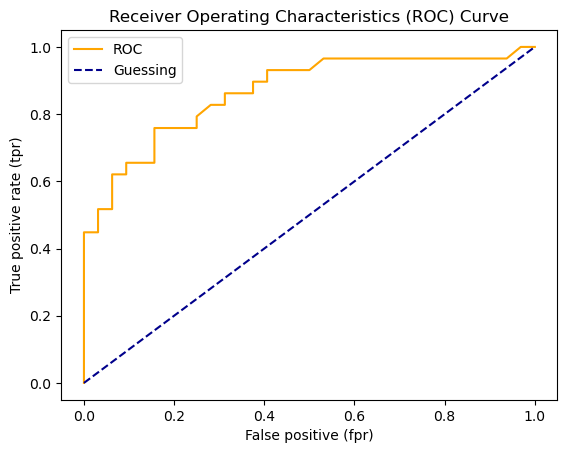

In [22]:
#  Create a function for plotting ROC curves
def plot_roc_curve(fpr,tpr):
    """_summary_
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle = "--",label="Guessing")
    
    # Customize plot
    plt.xlabel("False positive (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
#Reverse it for now cuz idk what's wrong w/ the code!!!!!!!!!
plot_roc_curve(tpr,fpr)

Everything under the curve is valid (91% of the chart is covered which is why it has a 0.91/91% Area under the receiver operating characteristic curve)


In [23]:
from sklearn.metrics import roc_auc_score

# Reverse values cuz idk whasts wrong w/ the code

1-roc_auc_score(y_test,y_probs_positive)

0.8658405172413793

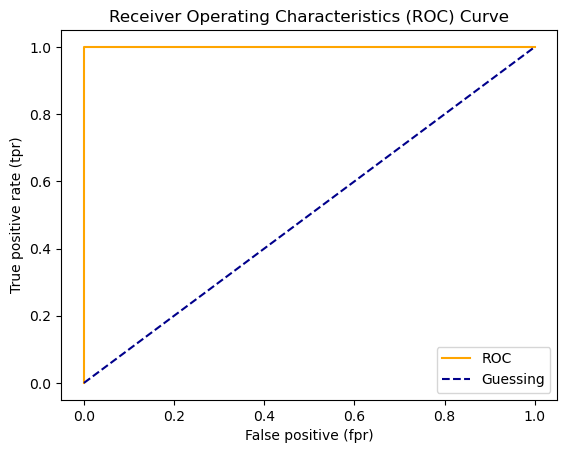

In [24]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [25]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

A perfect AUC score covers 100%/perpendicular to the guessing line trend, has a 1.0 AUC score

#### Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

Gives you an idea of where the model is getting confused

In [26]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[22,  7],
       [ 7, 25]], dtype=int64)

##### Confusion matrix with pandas

In [27]:
# Visualize confusion matrix with pd.crosstab
pd.crosstab(y_test
            ,y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,22,7
1,7,25


<Axes: >

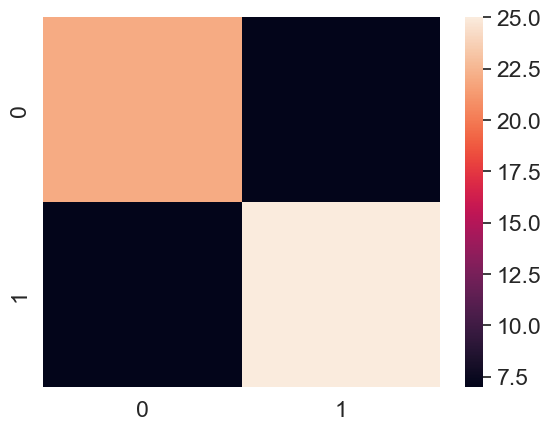

In [28]:
# Make our confusion matrix more visual with Seaborn's heatmap

#Set the font scale
sns.set(font_scale = 1.5)

#Create confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat)

##### Confusion Matrix with Scikit Learn

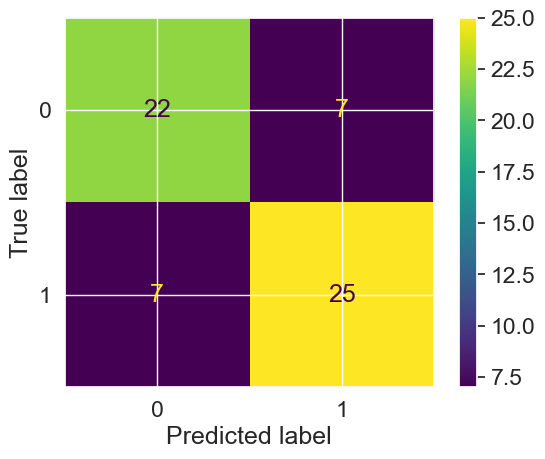

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
# Based from predictions
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

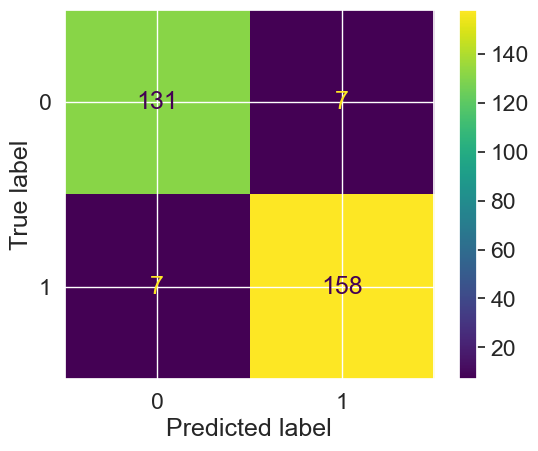

In [30]:
# Based on the whole dataset
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

#### Classification Report

Collection of different classification evaluation metrics

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Precision - 1 - (False Positive / True Positive) . No false positive = 1.0

Recall - 1 - (False Negative / True Negative). No false negatives has a recall of 1.0

F1 score = combination of Precision and Recall, Checks the balance of precision and recall since we can't look at precision and recall individually only 

Support - The number of samples each metric was calculated on

Accuracy - accuracy in decimal form

Macro AVG - average precision,recall and f1 score between classes. Macro avg doesn't class imbalance into effort,so if you do have class imbalances, pay attention to this metric. 0 and 1 are divided into 50-50%

Weighted AVG - weighted average precision,recall and F1 score between classes. Metric is calculated with respect to how many samples there are in each class. This metric will favor the majority class

In [32]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

# Generate classification report as a dictionary
report_dict = classification_report(disease_true, disease_preds, output_dict=True)

# Convert dictionary to DataFrame
df = pd.DataFrame(report_dict)
df

b:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
b:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
b:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression Model Evaluation Metrics

#### R^2 / Coefficient of Determination

R^2 = proportion of the variation in the dependent variable (y/target) that is predictable from the independent variable (X/features)

R^2 is similar to r^2 (correlation), except it's more focused on models with multiple data that can predict Y

The highest value for .score() method is 1.0, the lowest is 0.0

In [33]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [34]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [35]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)


RandomForestRegressor()

In [36]:
y_preds = model.predict(X_test)
model.score(X_test,y_test)

0.8065734772187598

In [37]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [38]:
# We will get 0.0 if we just predict the mean of y
y_test.mean()

2.0550030959302323

In [39]:
from sklearn.metrics import r2_score

# Fill an array w/ y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [40]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

#### Mean Absolute Error (MAE)

Average absolute differences between predictions and actual predictions

In [41]:
from sklearn.metrics import mean_absolute_error

# On average the predicted value is -0.32 +0.32 away from the actual value
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [42]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()


,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [43]:

np.mean(df["differences"]), np.mean(np.abs(df["differences"]))


(0.012048392126937589, 0.32659871732073664)

#### Mean Squared Error (MSE)

Better for detecting multiple outliers since it's a squared value (it amplifies the mistake by more)

In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_preds)

0.2534678520824551

In [45]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [46]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [47]:
df_large_error = df.copy()
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [48]:
# Calculate MSE with large error
np.mean(df_large_error["squared_differences"])

0.7295421709146245

## 4. Scoring Parameter

### Classification Model Example

In [49]:
# import model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Create train/test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create classifier model instance
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used (in this case it's accuracy), we can use scoring="accuracy"
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [51]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is 82.48%


In [52]:
np.random.seed(42)

# Cross-validation precision
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="precision") 
cv_acc
print(f"The cross-validated precision is {np.mean(cv_acc)*100:.2f}%")


The cross-validated precision is 83.30%


In [53]:
np.random.seed(42)

# Cross-validation recall
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="recall") 
cv_acc
print(f"The cross-validated recall is {np.mean(cv_acc)*100:.2f}%")


The cross-validated recall is 85.45%


### Regression Model Example

In [54]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X and y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Create train/test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Cache the model,fit and predict
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=10)

In [55]:
np.random.seed(42)

# Cross-validation R2
cv_acc = cross_val_score(model,X,y,cv=5,scoring=None) 
cv_acc


array([0.45027534, 0.66933133, 0.70839885, 0.59085943, 0.66076133])

In [56]:
# Cross-validated R2
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is 61.59%


In [57]:
np.random.seed(42)

# Cross-validation R2
cv_acc = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error") 
cv_acc



array([-0.59055395, -0.38706856, -0.41947718, -0.47999733, -0.49432453])

In [58]:
# Cross-validated R2
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is -47.43%


In [59]:
np.random.seed(42)

# Cross-validation R2
cv_acc = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error") 
cv_acc


array([-0.59055395, -0.38706856, -0.41947718, -0.47999733, -0.49432453])

In [60]:
np.random.seed(42)

# Cross-validation R2
cv_acc = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error") 
cv_acc



array([-0.57425625, -0.43051616, -0.46272942, -0.4821693 , -0.49324189])

In [61]:
# Cross-validated R2
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is -48.86%


## 5. Scikitlearn Functions

Using sklearn.metrics https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### Classification Example

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create model
clf = RandomForestClassifier(n_estimators=50)

# Fit model
clf.fit(X_train,y_train)

# Evaluate model using evaluation functions
y_preds = clf.predict(X_test)
accuracy_score(y_test,y_preds),precision_score(y_test,y_preds),recall_score(y_test,y_preds),f1_score(y_test,y_preds)

(0.7704918032786885,
 0.7777777777777778,
 0.8235294117647058,
 0.7999999999999999)

### Regression Example

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

housing_df = pd.DataFrame(housing["data"],
                          columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df

# Create X & y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create the model
model = RandomForestRegressor(n_estimators=50)

# Fit the model
model.fit(X_train,y_train)

# Evaluate the model using evaluation functions
y_preds = model.predict(X_test)
y_preds

r2_score(y_test,y_preds),mean_absolute_error(y_test,y_preds), mean_squared_error(y_test,y_preds)


(0.7872099676721879, 0.3392453893895349, 0.28373903897765773)